In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
import numpy as np
from joblib import dump, load
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import pickle
import dill
from joblib import dump, load
import statistics

In [2]:
file_path = '/Users/campbelle2/Desktop/obesity_prediction/'

rand_seeds = load(file_path + 'rand_seeds_200.joblib')

In [3]:
results = load('/Users/campbelle2/Desktop/obesity_prediction/LR_results_200.joblib')

In [4]:
results['auc']

{103689: [0.6773977979156591,
  0.7249080128676858,
  0.7617294982583769,
  0.7684983494880259,
  0.7688039219808946,
  0.7684892383815871,
  0.7684247597821744],
 109022: [0.688068305264117,
  0.7413808933089435,
  0.7787154040775706,
  0.78169894100909,
  0.7804913689787849,
  0.7802271468920613,
  0.7801514546231857],
 129224: [0.6900657401372273,
  0.7388122621475578,
  0.7654461288310449,
  0.7696344343755036,
  0.7699743487311032,
  0.7699035624426176,
  0.7698874427927642],
 135767: [0.6940420372433997,
  0.7432462171386921,
  0.7682835376323739,
  0.772593090977902,
  0.7731068172101792,
  0.7729673471962322,
  0.7729351078965258],
 138938: [0.70440276697294,
  0.7467799247282437,
  0.7754364570411332,
  0.7811224883132539,
  0.781276676268371,
  0.7812963001899316,
  0.781284385666127],
 144638: [0.6850711016729393,
  0.7369020836399571,
  0.7729049711598438,
  0.7795056173475465,
  0.7798294120532929,
  0.7796072412270557,
  0.779556779714472],
 145503: [0.6801801896511848,
 

In [5]:
auc_plot = []

In [6]:
auc_plot = []
for seed in results['auc']:
    auc_plot.append(results['auc'][seed])
auc_plot = np.array(auc_plot)        

In [7]:
auc_plot.shape

(200, 7)

In [8]:
mean_auc = np.mean(auc_plot, axis = 0)

In [9]:
max(mean_auc)

0.778002691280671

In [10]:
max_id = np.where(mean_auc == max(mean_auc))[0][0]

In [11]:
opt_col = auc_plot[:,max_id]

(array([ 1.,  8., 16., 36., 48., 35., 31., 17.,  6.,  2.]),
 array([0.75523153, 0.75983498, 0.76443844, 0.7690419 , 0.77364535,
        0.77824881, 0.78285227, 0.78745572, 0.79205918, 0.79666264,
        0.80126609]),
 <a list of 10 Patch objects>)

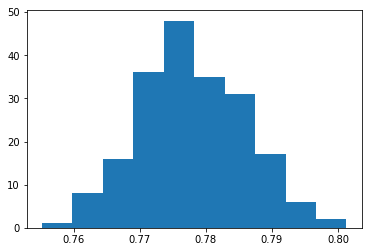

In [12]:
plt.hist(opt_col)

In [13]:
with open(file_path + 'ml_data.pik', "rb") as f:
            data = dill.load(f)

In [14]:
x = data['x']
y = data['y']

In [15]:
statistics.mean(opt_col)

0.7780026912806711

In [16]:
statistics.stdev(opt_col)

0.007974932413153472

In [17]:
def subgroup_analysis(subgroup_name):
    bootstrap_subgroup_metrics = dict.fromkeys(rand_seeds)

    for seed in rand_seeds:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y, random_state = seed)

        temp_df = pd.DataFrame()
        temp_df[subgroup_name] = x_test[subgroup_name].values
        temp_df['y_true'] = y_test.values
        temp_df['y_pred_prob'] = results['prediction_probabilities'][seed][max_id][:,1]
        if subgroup_name == 'race':
            temp_df = temp_df.loc[temp_df[subgroup_name]!= 6]

        subgroup_cat = temp_df[subgroup_name].unique()
        subgroup_metrics = dict.fromkeys(subgroup_cat)

        for cat in subgroup_cat:
            subset = temp_df.loc[temp_df[subgroup_name] == cat]
            auc = roc_auc_score(subset.y_true.values, subset.y_pred_prob.values)
            subgroup_metrics[cat] = auc

        bootstrap_subgroup_metrics[seed] = subgroup_metrics
        
    metrics = list(bootstrap_subgroup_metrics.values())
    res_list = dict.fromkeys(subgroup_cat)
    for i in res_list:
        res_list[i] = []

    for cat in subgroup_cat:
        for res in metrics:
            res_list[cat].append(res[cat])
    
    
    return bootstrap_subgroup_metrics, res_list
    

In [18]:
print(results.keys())

dict_keys(['auc', 'prediction_probabilities'])


In [19]:
_, gender_metrics = subgroup_analysis('gender_concept_id')

In [20]:
male = gender_metrics[0]

In [21]:
female = gender_metrics[1]

In [22]:
statistics.mean(male)

0.7777200007287967

In [23]:
statistics.stdev(male)

0.011831108708648886

In [24]:
statistics.mean(female)

0.7797073804304446

In [25]:
statistics.stdev(female)

0.011999471833676972

In [26]:
_, medicaid_metrics = subgroup_analysis('medicaid') 

In [27]:
no_med = medicaid_metrics[0]
med = medicaid_metrics[1]

In [28]:
statistics.stdev(no_med)

0.01026100455366232

In [29]:
statistics.mean(no_med)

0.7557572876710901

In [30]:
statistics.mean(med)

0.7999550335705419

In [31]:
statistics.stdev(med)

0.01276913193728416

In [32]:
_, agecat_metrics = subgroup_analysis('age_cat') 

In [33]:
young = agecat_metrics[1]

In [34]:
statistics.mean(young)

0.7649449149978389

In [35]:
statistics.stdev(young)

0.01644724696516975

In [36]:
middle = agecat_metrics[2]

In [37]:
statistics.mean(middle)

0.8027289367367786

In [38]:
statistics.stdev(middle)

0.012103609250679853

In [39]:
old = agecat_metrics[3]

In [40]:
statistics.mean(old)

0.7575560469803225

In [41]:
statistics.stdev(old)

0.014500883147184604

In [42]:
_, asian = subgroup_analysis('race_1')

In [43]:
asian = asian[1]

In [44]:
statistics.mean(asian)

0.7685393226492238

In [45]:
statistics.stdev(asian)

0.05064211302792859

In [46]:
_, AA = subgroup_analysis('race_2')
AA = AA[1]
statistics.mean(AA)


0.7799177530788654

In [47]:
statistics.stdev(AA)

0.01557955624603463

In [48]:
_, white = subgroup_analysis('race_3')
white = white[1]
statistics.mean(white)


0.7555016126025813

In [49]:
statistics.stdev(white)

0.011359963868974558

In [50]:
_, hispanic = subgroup_analysis('race_4')
hispanic = hispanic[1]
statistics.mean(hispanic)

0.7737140080524337

In [51]:
statistics.stdev(hispanic)

0.04163360007260793

In [52]:
_, multi = subgroup_analysis('race_5')
multi = multi[1]
statistics.mean(multi)

0.7710771984016777

In [53]:
statistics.stdev(multi)

0.07751567665222169

In [54]:
_, unknown = subgroup_analysis('race_7')
unknown = unknown[1]
statistics.mean(unknown)

0.7340267696478224

In [55]:
statistics.stdev(unknown)

0.032503028484822824